In [21]:
import numpy as np
import pandas as pd
import time
import datetime
import ccxt
import matplotlib.pyplot as plt
import hdbscan
from sklearn.preprocessing import StandardScaler, RobustScaler

In [22]:
def get_binance_data(symbol, interval, end_date):
    btc_ohlcv = binance.fetch_ohlcv(symbol, interval, limit=1000, params={'endTime':end_date})
    df = pd.DataFrame(btc_ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    df.set_index('datetime', inplace=True)
    return df

In [23]:
now = datetime.datetime.utcnow() + datetime.timedelta(hours=9)
symbol = 'BTCUSDT'
interval = '1h'
binance = ccxt.binance()

In [24]:
dfs = []
df = get_binance_data(symbol, interval, int(datetime.datetime.timestamp(now))*1000)
dfs.append(df)

In [25]:
try:
    while True:
        df = get_binance_data(symbol, interval, int(datetime.datetime.timestamp(df.index[0]))*1000)
        dfs.append(df)
        time.sleep(0.2)
except:
    pass

In [26]:
df = pd.concat(dfs)
df = df.sort_index()

In [27]:
scaler = RobustScaler()
df_scale =  pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [35]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000)
df["dbscan_cluster"] = clusterer.fit_predict(np.array(df_scale['close']).reshape(-1, 1))
len(df["dbscan_cluster"].unique())

16

31310.95
24311.45
23830.91
22341.8
21832.95
18466.87
17714.01
15836.41


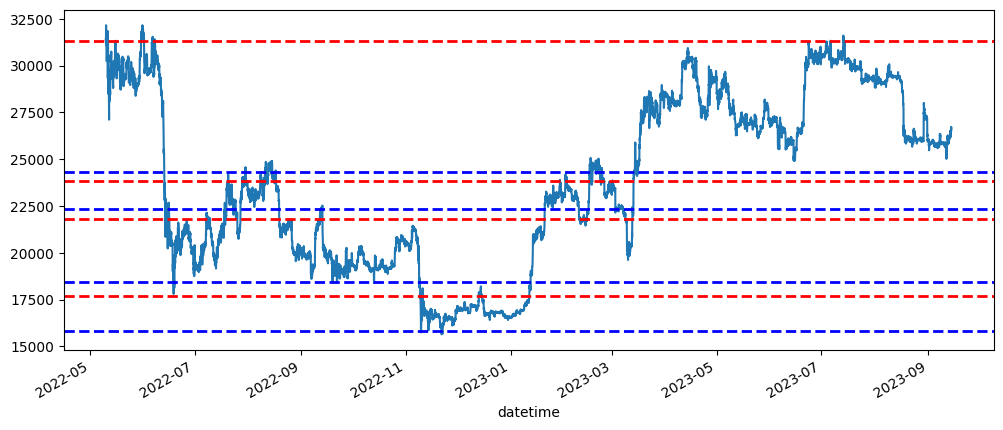

In [36]:
temp = df[41000:]
temp['close'].plot(figsize=(12, 5))
for n in temp["dbscan_cluster"].unique():
    if n != -1:
        plt.axhline(temp[temp['dbscan_cluster']==n]['close'].max(), color='red', linestyle='--', linewidth=2)
        print(temp[temp['dbscan_cluster']==n]['close'].max())
        plt.axhline(temp[temp['dbscan_cluster']==n]['close'].min(), color='blue', linestyle='--', linewidth=2)
        print(temp[temp['dbscan_cluster']==n]['close'].min())

In [30]:
print(temp["dbscan_cluster"].unique())

[ 8 -1 29 16 30 27 28 23 21 22 17 37 38 36 10 11 24]
